In [1]:
# Uncomment pyximport to compile instead of running pure python
#import pyximport; pyximport.install(language_level=3)

from matplotlib import pyplot as plt
from py_ballisticcalc import Velocity, Distance, Angular
from py_ballisticcalc import DragModel, TableG7
from py_ballisticcalc import Ammo
from py_ballisticcalc import Weapon, Shot, Calculator
from py_ballisticcalc import Settings as Set

print("Default units:\n"+str(Set.Units))  # Print default units

Default units:
angular = degree
distance = yard
velocity = fps
pressure = hp
temperature = celsius
diameter = inch
length = inch
weight = grain
adjustment = mil
drop = inch
energy = joule
ogw = pound
sight_height = inch
target_height = inch
twist = inch


In [2]:
# Define standard .308
dm = DragModel(0.22, TableG7, 168, 0.308)
ammo = Ammo(dm, 1.22, Velocity(2600, Velocity.FPS))
weapon = Weapon(4, 12)
zero = Shot(weapon=weapon, ammo=ammo)
# Establish 100-yard zero
calc = Calculator()
zero_elevation = calc.set_weapon_zero(zero, Distance.Yard(100))
print(f'Barrel elevation for zero: {zero_elevation << Angular.MOA}')

Barrel elevation for zero: 6.41moa


Danger space at 300.0yd for 19.7inch tall target ranges from 187.533yd to 361.7yd


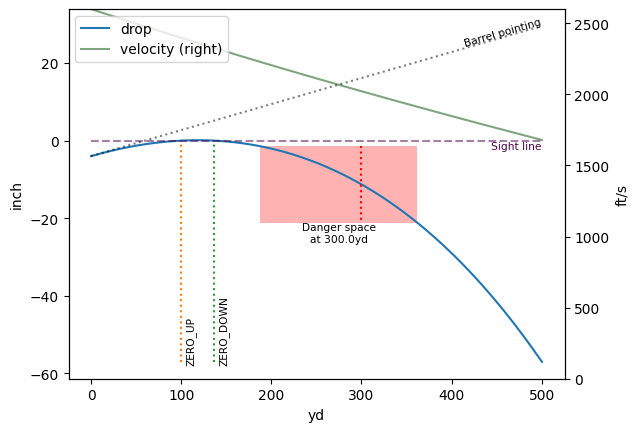

In [3]:
# Plot trajectory out to 500 yards
shot_result = calc.fire(zero, trajectory_range=500, extra_data=True)
ax = shot_result.plot()
# Find danger space for a half-meter tall target at 300 yards
danger_space = shot_result.danger_space(Distance.Yard(300), Distance.Meter(.5), Angular.Mil(0))
print(danger_space)
# Highlight danger space on the plot
danger_space.overlay(ax)
plt.show()

In [6]:
# Now find the elevation needed to hit a target at 200 yards with 10-degree look angle
target = Distance.Yard(200)
zero.look_angle = Angular.Degree(10)
high_elevation = calc.set_weapon_zero(shot=zero, zero_distance=target)
print(f'To hit target at {target << Set.Units.distance} sighted at a ' 
      f'{zero.look_angle << Angular.Degree} look angle, zero elevation={high_elevation << Angular.MOA}')

To hit target at 200.0yd sighted at a 10.0° look angle, zero elevation=7.34moa


Danger space at 300.0yd for 19.7inch tall target ranges from 164.667yd to 362.433yd


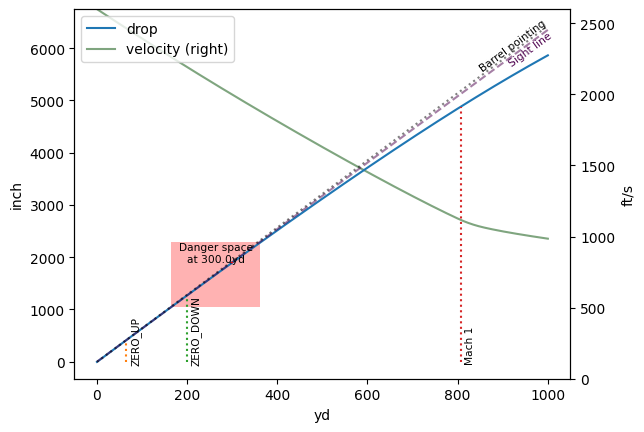

In [7]:
# Plot the trajectory for the new zero
shot_result = calc.fire(zero, trajectory_range=1000, extra_data=True)
ax = shot_result.plot()
# Find danger space for a target
danger_space = shot_result.danger_space(Distance.Yard(300), Distance.Meter(.5), shot_result.shot.look_angle)
print(danger_space)
# Highlight danger space on the plot
danger_space.overlay(ax)
plt.show()

In [9]:
shot_result.dataframe.to_clipboard()

In [8]:
# Now shooter prints range card for this new zero
zero.look_angle = 0
calc.set_weapon_zero(zero, Distance.Yard(200))
shot_result = calc.fire(zero, trajectory_range=1000)
for p in shot_result:
    print(p.formatted())

('0.00 s', '0.000 yd', '2600.0 ft/s', '2.33 mach', '-4.0 inch', '0.00 mil', '0.0 inch', '0.00 mil', '0.1233 °', '3419 J', '744.098 lb', 8)
('0.12 s', '100.000 yd', '2398.1 ft/s', '2.15 mach', '1.0 inch', '0.29 mil', '-0.1 inch', '-0.02 mil', '0.0345 °', '2908 J', '583.865 lb', 8)
('0.25 s', '200.050 yd', '2205.4 ft/s', '1.98 mach', '-0.0 inch', '-0.00 mil', '-0.3 inch', '-0.04 mil', '-0.0702 °', '2460 J', '454.104 lb', 8)
('0.39 s', '300.050 yd', '2022.2 ft/s', '1.81 mach', '-8.2 inch', '-0.77 mil', '-0.7 inch', '-0.06 mil', '-0.1943 °', '2068 J', '350.103 lb', 8)
('0.55 s', '400.050 yd', '1847.5 ft/s', '1.65 mach', '-24.9 inch', '-1.76 mil', '-1.2 inch', '-0.08 mil', '-0.3424 °', '1726 J', '266.954 lb', 8)
('0.72 s', '500.000 yd', '1680.1 ft/s', '1.50 mach', '-51.8 inch', '-2.93 mil', '-2.0 inch', '-0.11 mil', '-0.5206 °', '1428 J', '200.776 lb', 8)
('0.91 s', '600.000 yd', '1519.5 ft/s', '1.36 mach', '-91.1 inch', '-4.30 mil', '-3.0 inch', '-0.14 mil', '-0.7374 °', '1168 J', '148.526

In [32]:
# Now shooter is looking at a 500 yard target:
print(f'Zero hits {shot_result.trajectory[5].drop << Set.Units.drop} at {(shot_result.trajectory[5].distance << Set.Units.distance)}')
# Shooter looks up adjustment to hit 500 yard target:
hold = shot_result.trajectory[5].drop_adj
print(f'Sight adjustment to hit {(shot_result.trajectory[5].distance << Set.Units.distance)} target'
      f' is {(hold << Set.Units.adjustment)}')
# Shooter dials that hold value for a 500-yard shot
zero.relative_angle = Angular(-hold.raw_value, hold.units)
adjusted_result = calc.fire(zero, trajectory_range=1000)
print(f'After adjustment: drop at {adjusted_result.trajectory[5].distance << Set.Units.distance}'
      f' is {adjusted_result.trajectory[5].drop << Set.Units.drop}'
      )

Zero hits -51.8inch at 500.0yd
Sight adjustment to hit 500.0yd target is -2.93mil
After adjustment: drop at 500.0yd is -0.0inch
